# Age of People in Congress

Downloads libraries and data and creates dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
congress = pd.read_csv('congress-terms.csv', parse_dates = ['termstart'])
congress

,congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age
0,80,house,M000112,Joseph,Jefferson,Mansfield,NaN,1861-02-09,TX,D,Yes,1947-01-03,85.9
1,80,house,D000448,Robert,Lee,Doughton,NaN,1863-11-07,NC,D,Yes,1947-01-03,83.2
2,80,house,S000001,Adolph,Joachim,Sabath,NaN,1866-04-04,IL,D,Yes,1947-01-03,80.7
3,80,house,E000023,Charles,Aubrey,Eaton,NaN,1868-03-29,NJ,R,Yes,1947-01-03,78.8
4,80,house,L000296,William,NaN,Lewis,NaN,1868-09-22,KY,R,No,1947-01-03,78.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18630,113,senate,B000243,Max,S.,Baucus,NaN,1937-12-10,MT,D,Yes,2013-01-03,75.1
18631,113,senate,C001099,William,NaN,Cowan,NaN,1965-04-03,MA,D,No,2013-01-03,47.8
18632,113,senate,C001100,Jeffrey,Scott,Chiesa,NaN,1961-06-21,NJ,R,No,2013-01-03,51.5
18633,113,senate,K000148,John,Forbes,Kerry,NaN,1939-12-10,MA,D,Yes,2013-01-03,73.1


Creates new column that contains only the year of each term start

In [3]:
congress['year_term_start'] = [d.year for d in congress.termstart]

Replaces all instances of 'Yes' in incumbent column with 1 and 'No' with 0, then casts the integers to Booleans

In [4]:
congress.incumbent = congress.incumbent.replace(['Yes'], 1) 
congress.incumbent = congress.incumbent.replace(['No'], 0) 
congress.incumbent = congress.incumbent.astype(bool)

## Which party elects older politicians?

Creates a histogram comparing the number of politicians elected per party at each age

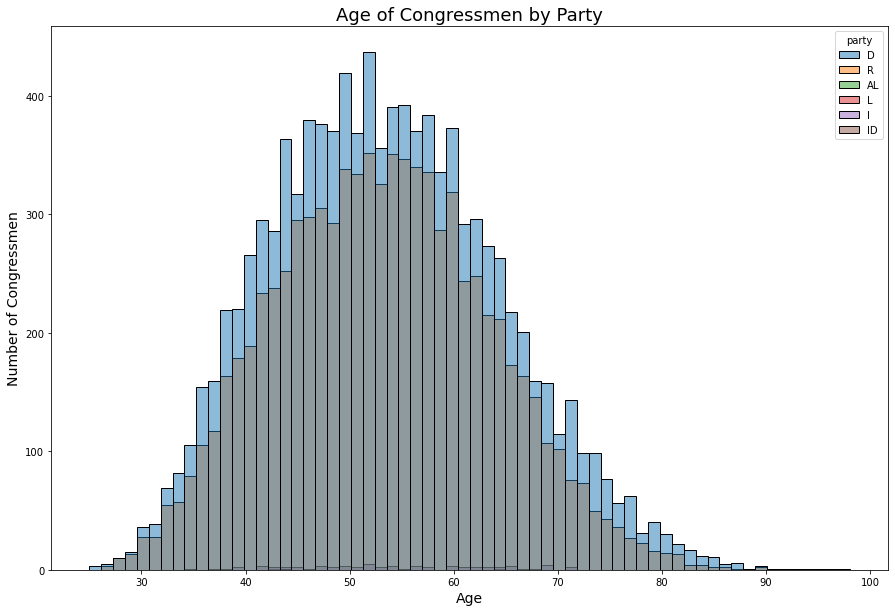

In [5]:
plt.figure(figsize = (15,10))
plt.title('Age of Congressmen by Party', fontsize = 18)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Number of Congressmen', fontsize = 14)

sns.histplot(congress, x = congress.age, hue = congress.party)
plt.show()

#### Results: 
Democrats and Republicans tend to follow the same trends for the age of their politicians - while Republicans skew slightly older than Democrats, both parties elect politicians of about the same age at very similar rates. Additionally, both parties tend to elect the most politicians in their 50s. 

Overall, neither party tends to elect more of a certain age group - the only definitive data is that there are more elected Democrats than Republicans.

## Are politicians getting older or younger?

### Overall

Creates a line plot showing the average age of congressmen elected each year.

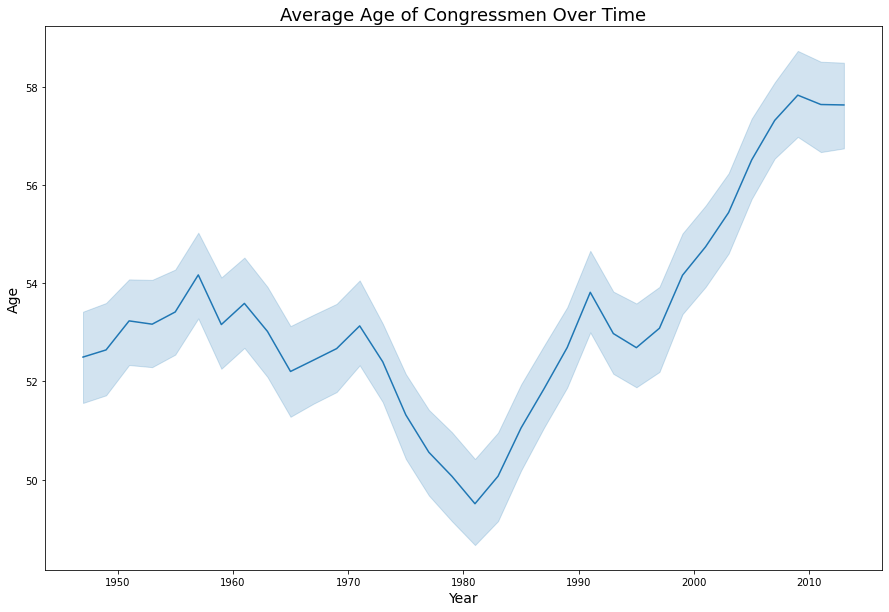

In [6]:
plt.figure(figsize = (15,10))
plt.title('Average Age of Congressmen Over Time', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Age', fontsize = 14)

sns.lineplot(x = congress.year_term_start, y = congress.age) 
plt.show() 

Finds average ages in 1947 and 2013 (shown in graph)

In [7]:
congress.loc[congress.congress == 80].age.mean()

52.495855855855766

In [8]:
congress.loc[congress.congress == 113].age.mean()

57.629044117647034

#### Results:
Over time, the average age of congressmen has increased from 52.5 in 1947 to 57.6 in 2013.

### By party:

Creates separate dataframe that contain either Democrats or Republicans

In [9]:
dem = pd.DataFrame(congress.loc[congress.party == 'D'])
rep = pd.DataFrame(congress.loc[congress.party == 'R'])

Creates a line plot showing the average age of politicians in each of the major parties in comparison the to average age of elected politicians across all parties. 

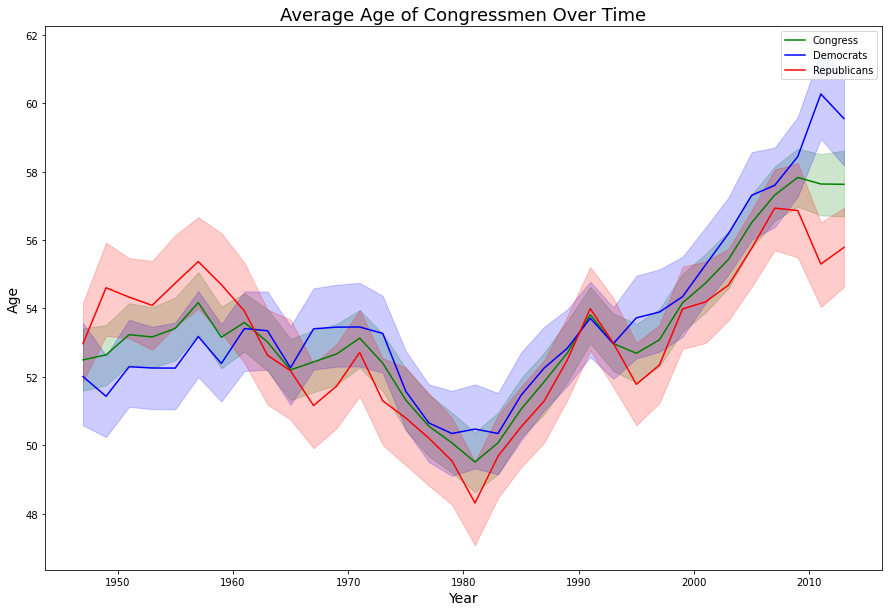

In [10]:
plt.figure(figsize = (15,10))
plt.title('Average Age of Congressmen Over Time', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Age', fontsize = 14)

sns.lineplot(x = congress.year_term_start, y = congress.age, label = 'Congress', color = 'green') 
sns.lineplot(x = dem.year_term_start, y = dem.age, label = 'Democrats', color = 'blue') 
sns.lineplot(x = rep.year_term_start, y = rep.age, label = 'Republicans', color = 'red') 
plt.show() 

In [11]:
dem.loc[dem.congress == 80].age.mean()

52.006882591093145

In [12]:
dem.loc[dem.congress == 113].age.mean()

59.55096525096528

In [13]:
rep.loc[rep.congress == 80].age.mean()

52.96960784313725

In [14]:
rep.loc[rep.congress == 113].age.mean()

55.78233215547703

#### Results:
Both parties saw an overall increase in the average age of elected politicians. The average age of Democrats increased from 52 in 1947 to 59.6 in 2013, and the average age of Republicans increased from 53 in 1947 to 55.8 in 2013.

While Democrats started off by electing (slightly) younger politicians than the Republican party, the average switched in the early 1960s and stayed that way until 2013. 

## Which major party experiences more turnover in politicians?

Creates new dataframe that contains only newly-elected politicians, then groups it by number per year

In [15]:
new_elects = congress.loc[congress.incumbent == False]
new_elects = new_elects.groupby(['year_term_start']).count()
new_elects

,congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age
year_term_start,,,,,,,,,,,,,
1947,143,143,143,143,132,143,13,143,143,143,143,143,143
1949,148,148,148,148,135,148,13,148,148,148,148,148,148
1951,98,98,98,98,91,98,8,98,98,98,98,98,98
1953,110,110,110,110,103,110,9,110,110,110,110,110,110
1955,69,69,69,69,59,69,10,69,69,69,69,69,69
1957,69,69,69,69,63,69,8,69,69,69,69,69,69
1959,111,111,111,111,100,111,5,111,111,111,111,111,111
1961,86,86,86,86,77,86,8,86,86,86,86,86,86
1963,88,88,88,88,80,88,7,88,88,88,88,88,88


Creates a barplot showing the number of newly-elected politicians per year

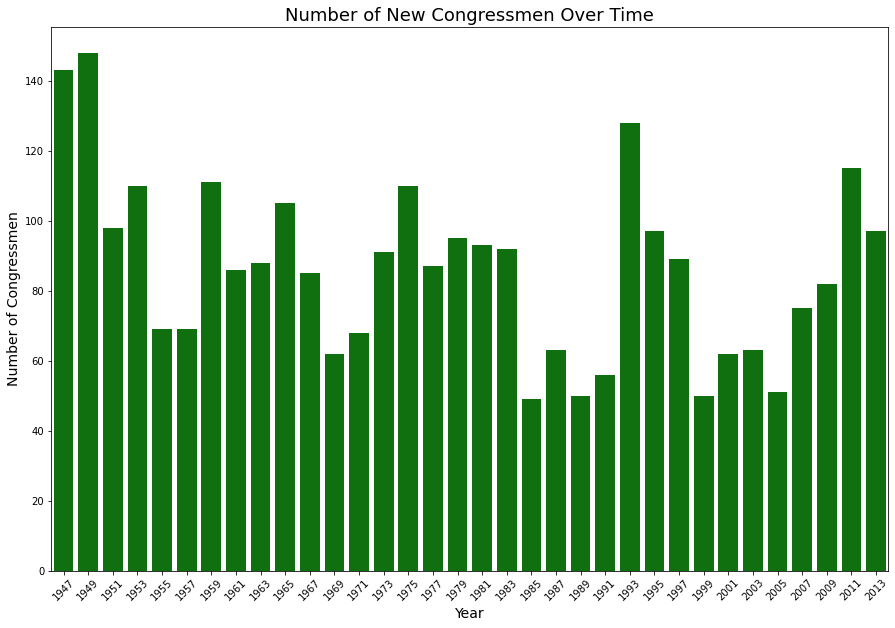

In [16]:
plt.figure(figsize = (15,10))

sns.barplot(x = new_elects.index, y = new_elects['incumbent'], color = 'green')

plt.title('Number of New Congressmen Over Time', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.xticks(rotation = 45)
plt.ylabel('Number of Congressmen', fontsize = 14)
plt.show() 

#### Results:

There are no consistent conclusions that I can draw from this. The only thing I can say for sure is that after several years with a lower number of new politicians (about 60), the number of new politicians tends to spike, whether the politicians lose their elections, retire, or move onto new office. 

Creates two dataframes in the same way as new_elects, now divided into Democrats and Republicans

In [17]:
dem_new_elects = dem.loc[dem.incumbent == False]
dem_new_elects = dem_new_elects.groupby(['year_term_start']).count()
rep_new_elects = rep.loc[rep.incumbent == False]
rep_new_elects = rep_new_elects.groupby(['year_term_start']).count()

Creates barplot comparing the number of newly-elected politicians per year based on party

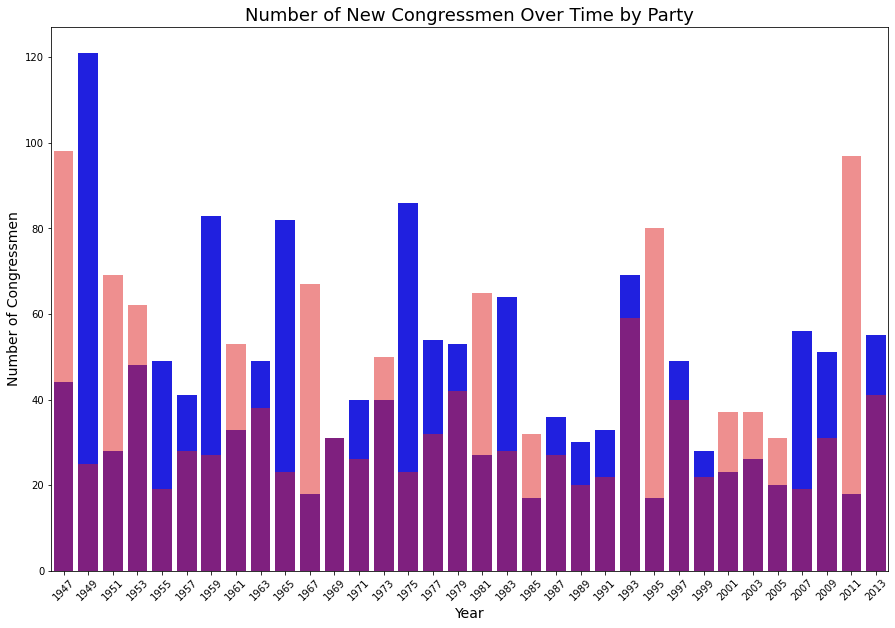

In [18]:
plt.figure(figsize = (15,10))

sns.barplot(x = dem_new_elects.index, y = dem_new_elects['incumbent'], color = 'blue')
sns.barplot(x = rep_new_elects.index, y = rep_new_elects['incumbent'], color = 'red', alpha = 0.5)
# https://www.tutorialkart.com/matplotlib-tutorial/matplotlib-pyplot-bar-plot-alpha/
# I used this to change the opacity of the bars

plt.title('Number of New Congressmen Over Time by Party', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.xticks(rotation = 45)
plt.ylabel('Number of Congressmen', fontsize = 14)
plt.show() 

#### Results:

Neither party tends to elect more new politicians - it really just depends on the year